In [1]:
# Imports
import numpy as np
import pandas as pd
import math
import random
from random import randint
import matplotlib.pyplot as plt
import time
import heapq
import networkx as nx

(a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an array for the priority queue. Implement the Dijkstra’s algorithm using this
setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically.

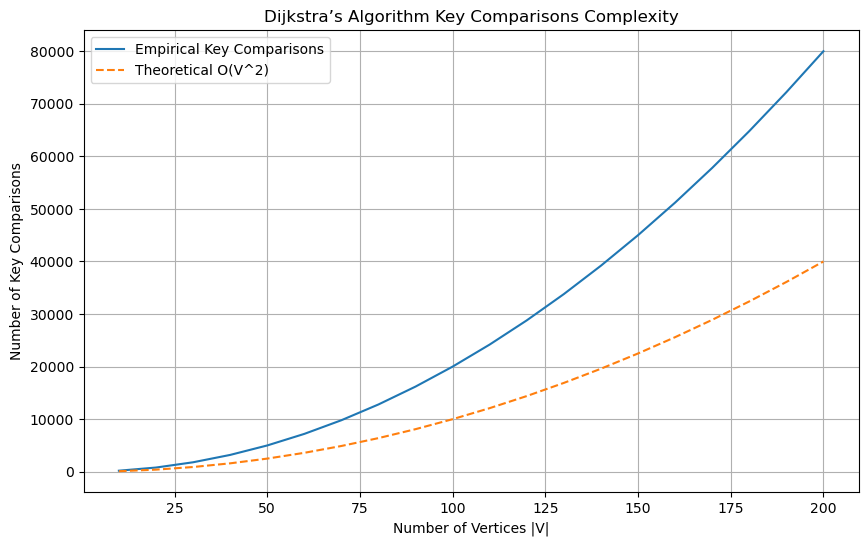

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dijkstra's Algorithm using adjacency matrix and array for priority queue with key comparisons tracking
def dijkstra_array_with_comparisons(graph, src):
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    visited = [False] * V
    key_comparisons = 0  # Track number of key comparisons

    for _ in range(V):
        # Find the vertex with the minimum distance value
        min_dist = float('inf')
        min_index = -1
        for v in range(V):
            key_comparisons += 1  # Comparison in finding the minimum vertex
            if not visited[v] and dist[v] < min_dist:
                min_dist = dist[v]
                min_index = v

        u = min_index
        visited[u] = True

        # Update distance value of the adjacent vertices of the picked vertex.
        for v in range(V):
            key_comparisons += 1  # Comparison for updating the distance
            if graph[u][v] > 0 and not visited[v] and dist[u] != float('inf') and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]

    return key_comparisons

# Generate a random graph represented by an adjacency matrix
def generate_graph(V, density=0.5):
    graph = np.zeros((V, V))
    for i in range(V):
        for j in range(i+1, V):
            if np.random.rand() <= density:
                weight = np.random.randint(1, 10)
                graph[i][j] = weight
                graph[j][i] = weight  # Because undirected graph
    return graph

# Empirical Analysis: Measure key comparisons
def empirical_analysis_key_comparisons(max_vertices):
    vertices_list = []
    comparisons = []
    
    for V in range(10, max_vertices+1, 10):
        graph = generate_graph(V, density=0.3)
        
        # Count key comparisons in Dijkstra's algorithm
        key_comparisons = dijkstra_array_with_comparisons(graph, 0)
        
        vertices_list.append(V)
        comparisons.append(key_comparisons)
    
    return vertices_list, comparisons

# Plotting the empirical results for key comparisons
def plot_key_comparisons(vertices, comparisons):
    plt.figure(figsize=(10,6))
    plt.plot(vertices, comparisons, label='Empirical Key Comparisons')
    
    # Theoretical O(V^2) key comparisons (scaling factor added for visual clarity)
    theoretical_comparisons = [(v**2) for v in vertices]
    plt.plot(vertices, theoretical_comparisons, label='Theoretical O(V^2)', linestyle='--')
    
    plt.xlabel('Number of Vertices |V|')
    plt.ylabel('Number of Key Comparisons')
    plt.title('Dijkstra’s Algorithm Key Comparisons Complexity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run Empirical Analysis
vertices, comparisons = empirical_analysis_key_comparisons(max_vertices=200)
plot_key_comparisons(vertices, comparisons)


# # Plotting the empirical results
# def plot_results(vertices, times):
#     plt.figure(figsize=(10,6))
#     plt.plot(vertices, times, label='Empirical Time')
    
#     # Theoretical O(V^2) complexity (scaling factor added for visual clarity)
#     theoretical_times = [(v**2) / (10**4) for v in vertices]
#     plt.plot(vertices, theoretical_times, label='Theoretical O(V^2)', linestyle='--')
    
#     plt.xlabel('Number of Vertices |V|')
#     plt.ylabel('Time (seconds)')
#     plt.title('Dijkstra’s Algorithm Time Complexity')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Run Empirical Analysis
# vertices, times = empirical_analysis(max_vertices=200)
# plot_results(vertices, times)


b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and we use a minimizing heap for the priority queue. Implement the Dijkstra’s
algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

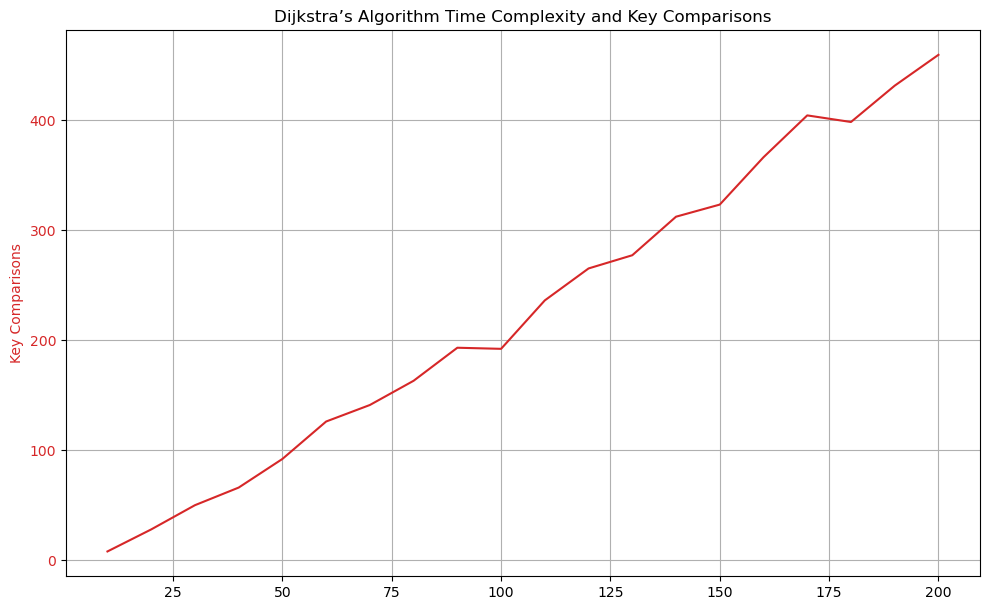

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import math
import time

def dijkstra_adj_list_min_heap(graph, source):
    # Initialize S (visited vertices), d (estimates of lengths), and pi (predecessors for each vertex)
    S = [0 for _ in range(len(graph))]  # Visited vertices
    d = [math.inf for _ in range(len(graph))]  # Distance estimates
    pi = [-1 for _ in range(len(graph))]  # Predecessors for each vertex
    d[source] = 0  # Distance to source is 0

    # Initialize priority queue
    pq = [(d[v], v) for v in range(len(graph))] 
    heapq.heapify(pq)  # O(V)

    key_comparisons = 0  # Track number of key comparisons

    while pq:
        # Get the closest estimated node
        u = heapq.heappop(pq)  # O(log V)
        S[u[1]] = 1  # Mark the node as visited

        # Check all vertices adjacent to u
        for v in graph[u[1]]:
            if S[v[0]] != 1 and d[v[0]] > d[u[1]] + v[1]:
                key_comparisons += 1  # Comparison for distance update
                # Update estimated distance
                d[v[0]] = d[u[1]] + v[1]
                pi[v[0]] = u[1]  # Update predecessor

                # Since we are using a min-heap, we need to remove v from the heap and add the new distance
                for x in range(len(pq)):
                    if pq[x][1] == v[0]:
                        pq.pop(x)  # Remove v from the priority queue
                        break
                heapq.heappush(pq, (d[v[0]], v[0]))  # Push updated v into queue

    return d, key_comparisons  # Return distance estimates and key comparisons

# Generate a random graph represented as an adjacency list
def generate_graph_as_adj_list(V, density=0.5):
    graph = [[] for _ in range(V)]
    for i in range(V):
        for j in range(i+1, V):
            if np.random.rand() <= density:
                weight = np.random.randint(1, 10)
                graph[i].append((j, weight))
                graph[j].append((i, weight))  # Because undirected graph
    return graph

# Empirical Analysis: Measure execution time and key comparisons
def empirical_analysis_time_comparisons(max_vertices):
    vertices_list = []
    times = []
    comparisons = []
    
    for V in range(10, max_vertices+1, 10):
        graph = generate_graph_as_adj_list(V, density=0.3)

        start_time = time.time()  # Start time measurement
        
        # Run Dijkstra's algorithm
        _, key_comparisons = dijkstra_adj_list_min_heap(graph, 0)
        
        end_time = time.time()  # End time measurement
        
        vertices_list.append(V)
        times.append(end_time - start_time)  # Total time in seconds
        comparisons.append(key_comparisons)
    
    return vertices_list, times, comparisons

# Plotting the empirical results for time and key comparisons
def plot_results(vertices, times, comparisons):
    fig, ax1 = plt.subplots(figsize=(10, 6))

#     # Plotting time
#     color = 'tab:blue'
#     ax2.set_xlabel('Number of Vertices |V|')
#     ax2.set_ylabel('Execution Time (seconds)', color=color)
#     ax2.plot(vertices, times, label='Empirical Time')
#     ax2.tick_params(axis='y', labelcolor=color)

    # Creating a second y-axis to plot key comparisons
#     ax1 = ax2.twinx()  
    color = 'tab:red'
    ax1.set_ylabel('Key Comparisons', color=color)  
    ax1.plot(vertices, comparisons, label='Empirical Key Comparisons', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.title('Dijkstra’s Algorithm Time Complexity and Key Comparisons')
    plt.grid(True)
    plt.show()

# Run Empirical Analysis
vertices, times, comparisons = empirical_analysis_time_comparisons(max_vertices=200)
plot_results(vertices, times, comparisons)
